In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
!wget https://www.dropbox.com/scl/fo/oi9huerppteppcz5t5b32/AJ_ykZC9n5AA0BJat_LlnYI?rlkey=uas4cay1272poo2jc6gf0n5rp&e=1 -O data

In [ ]:
!unzip AJ_ykZC9n5AA0BJat_LlnYI?rlkey=uas4cay1272poo2jc6gf0n5rp.1 -d "images/"

In [5]:
classes = os.listdir("images/Train")
classes

['Bulbasaur', 'Pikachu', 'Charmander']

In [9]:
print("Training Data")
for f in classes:
  path = "images/Train/"+f
  length = len(os.listdir(path))
  print(f"{f} - {len(os.listdir(path))}")

Training Data
Bulbasaur - 101
Pikachu - 101
Charmander - 102


In [12]:
print("Test Data")
for f in classes:
  path = "images/Test/"+f
  length = len(os.listdir(path))
  print(f"{f} - {len(os.listdir(path))}")

Test Data
Bulbasaur - 41
Pikachu - 40
Charmander - 42


In [13]:
from keras.preprocessing import image

In [39]:
train_data = []
train_labels = []

for category in classes:
  folder = f"images/Train/{category}"
  for img_name in os.listdir(folder):
    img_path = f"{folder}/{img_name}"
    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)
    train_data.append(img)
    train_labels.append(category)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [40]:
len(train_data)

304

In [41]:
len(train_labels)

304

In [35]:
# path = "images/Train/Pikachu/300.jpg"
# img = image.load_img(path, target_size=(100, 100))
# img = image.img_to_array(img)
# img.shape
# train_data.append(img)


In [36]:
# Data Preprocessing #

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [43]:
train_data = np.array(train_data)
train_data.shape

(304, 100, 100, 3)

In [45]:
train_labels = np.array(train_labels)
train_labels.shape

(304,)

In [46]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(304, 30000)

In [48]:
# train_labels

In [49]:
category2labels = {'Pikachu':0, 'Bulbasaur':2, 'Charmander':1}
label2category = {0:'Pikachu', 1:'Charmander', 2:'Bulbasaur'}

In [52]:
train_labels = np.array([category2labels[label] for label in train_labels])

In [53]:
train_labels.shape

(304,)

In [54]:
from keras.utils import to_categorical

In [55]:
train_labels = to_categorical(train_labels)

In [56]:
train_labels.shape

(304, 3)

In [57]:
train_labels[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [58]:
train_labels[-5:]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [59]:
# Model Architecture #

from keras.layers import Dense
from keras import Sequential

In [60]:
features = train_data.shape[1]

In [61]:
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(features,)))
model.add(Dense(units = 256, activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units = 64, activation='relu'))
model.add(Dense(units = 3, activation='softmax'))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │    15,360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,533,187 (59.25 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Model Training #

model.fit(train_data, train_labels, batch_size=32, epochs = 50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.3554 - loss: 2112.2637
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.4006 - loss: 1379.0537
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step - accuracy: 0.5116 - loss: 401.7760
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.5232 - loss: 501.7476
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.5346 - loss: 396.2418
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.5385 - loss: 374.1739
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.7097 - loss: 109.0796
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - accuracy: 0.8675 - loss: 44.4110
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 338ms/step - accuracy: 0.9008 - loss: 17.7121
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - accuracy: 0.8497 - loss: 21.9457
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - accuracy: 0.7560 - loss: 55.0388
Epoch 12/50
10/10 ━━━━━━━━━━━━━━

In [64]:
# Checking the Predictions #

test_data = []
test_labels = []

for category in classes:
  folder = f"images/Test/{category}"
  for img_name in os.listdir(folder):
    img_path = f"{folder}/{img_name}"
    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)
    test_data.append(img)
    test_labels.append(category)

In [65]:
len(test_data)

123

In [66]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [67]:
test_data.shape

(123, 100, 100, 3)

In [68]:
test_labels

array(['Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu',
       'Pikachu', 'Pikachu', 'Pikachu', 'Pikachu', 'Pikac

In [69]:
test_labels = np.array([category2labels[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [70]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [71]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9712 - loss: 13.1909


[18.09486198425293, 0.9593495726585388]

In [72]:
123 * 0.9712

119.4576

In [77]:
pred = model.predict(test_data).argmax(axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [78]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
[label2category[p] for p in pred]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 

In [104]:
test_img = "images/Test/Pikachu/2007.jpg"
img = image.load_img(test_img, target_size=(100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

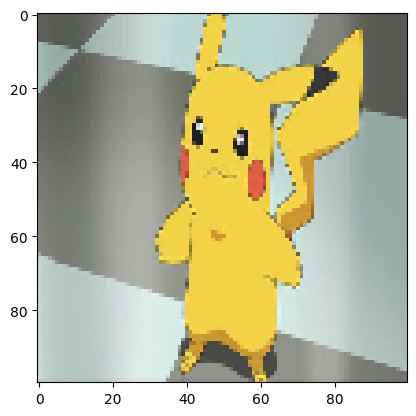

In [105]:
plt.imshow(img.astype('int'))

In [106]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [107]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


'Pikachu'

In [102]:
# 2nd Prediction #

In [108]:
test_img = "images/Test/Pikachu/2038.jpg"
img = image.load_img(test_img, target_size=(100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

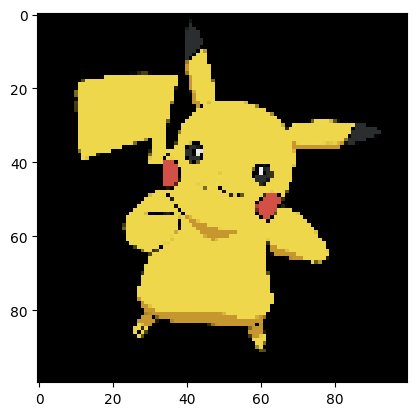

In [109]:
plt.imshow(img.astype('int'))

In [110]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [111]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


'Pikachu'

In [89]:
# 3rd Prediction #

In [112]:
test_img = "images/Test/Charmander/2207.jpg"
img = image.load_img(test_img, target_size=(100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

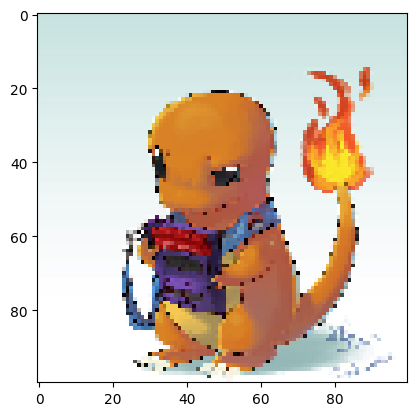

In [113]:
plt.imshow(img.astype('int'))

In [114]:
img = img.reshape(1, 30000)
img.shape

(1, 30000)

In [115]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


'Charmander'